# Video Coverter

## Data Load

In [2]:
import pandas as pd 
import numpy as np

df = pd.read_csv("model.csv")

df.head()

,id,duration,codec,width,height,bitrate,category,framerate,i,p,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,1,645.84000,vp8,320,240,95903,People & Blogs,25.032558,138,16008,...,6660941,0,7742262,vp8,109000,29.97,1280,720,218932,15.929
1,2,326.58832,h264,1920,1080,5999648,People & Blogs,23.000000,174,7656,...,228322925,0,244926878,flv,820000,29.97,1920,1080,218932,10.417
2,3,473.00000,h264,320,240,164017,Sports,25.000000,198,10924,...,8047423,0,9697521,h264,242000,24.00,1920,1080,645544,45.327
3,4,448.57500,vp8,1280,720,2052426,Gaming,30.002232,92,13349,...,105950761,0,115083398,h264,3000000,15.00,1920,1080,655172,102.842
4,5,255.28000,flv,320,240,250276,Music,25.000000,110,6272,...,7374864,0,7986338,mpeg4,820000,25.00,1920,1080,216820,14.937


In [3]:
df.isnull().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
category       0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

## EDA

### Categorical

In [4]:
df.columns

Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'category',
       'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size',
       'size', 'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height',
       'umem', 'utime'],
      dtype='object')

In [5]:
#Drop Category because it's not so meaningful and widht because for each widht there is a specific height

df_cat = df[["codec","height","o_codec", "o_height"]]

df_cat.head()

,codec,height,o_codec,o_height
0,vp8,240,vp8,720
1,h264,1080,flv,1080
2,h264,240,h264,1080
3,vp8,720,h264,1080
4,flv,240,mpeg4,1080


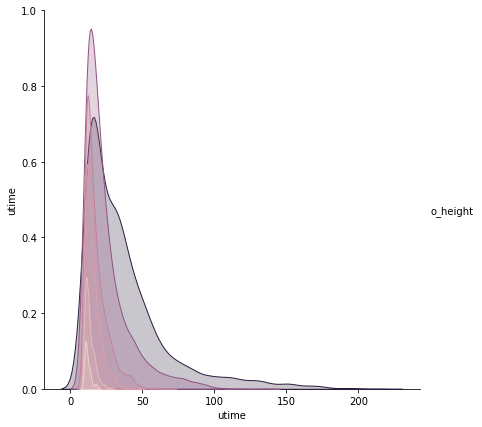

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df[["o_height","utime"]],hue="o_height", height=6)

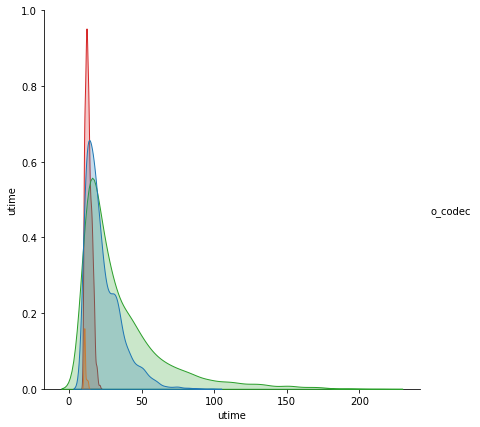

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df[["o_codec","utime"]],hue="o_codec", height=6)

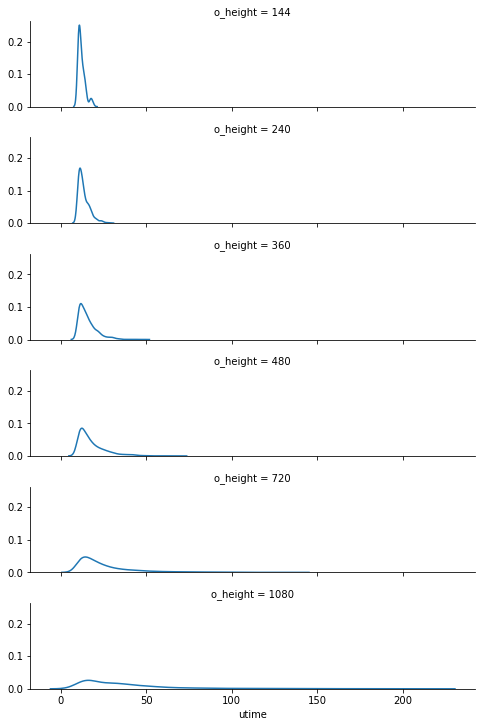

In [8]:
g = sns.FacetGrid(df, row="o_height", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "utime")

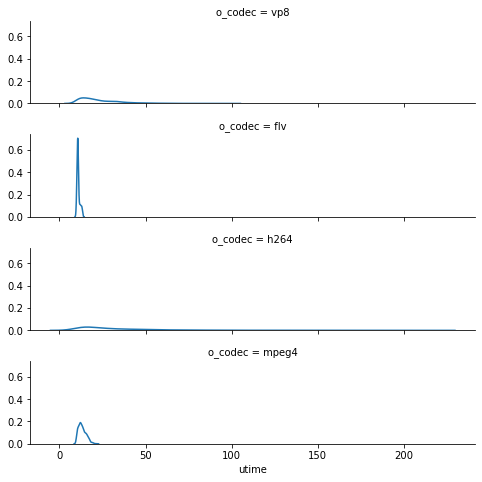

In [9]:
g = sns.FacetGrid(df, row="o_codec", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "utime")

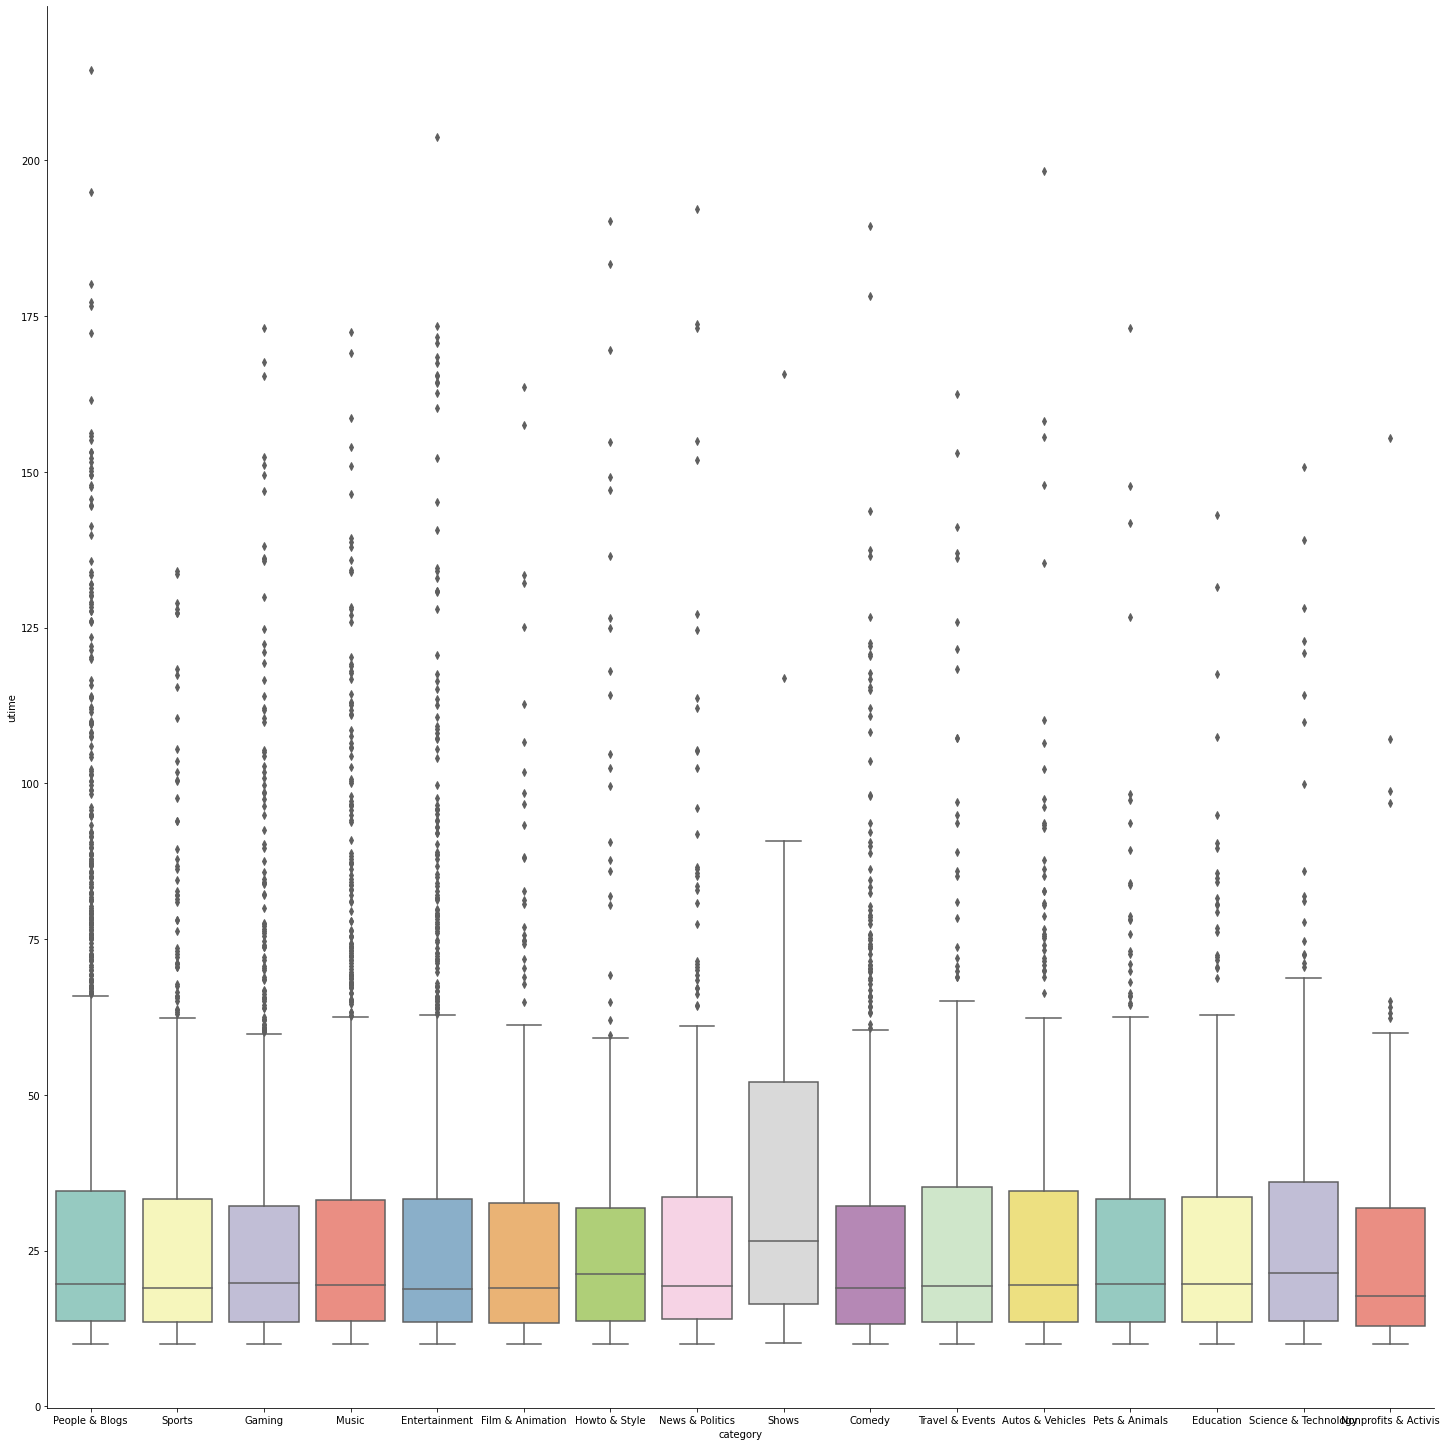

In [10]:
sns.catplot(data=df, x="category", y="utime",kind="box", palette="Set3", height = 20)

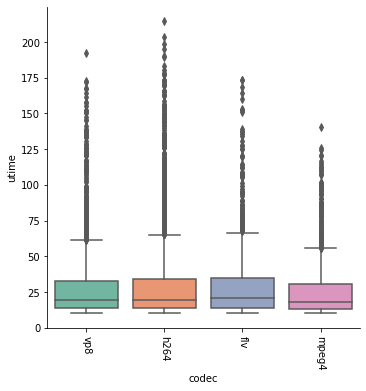

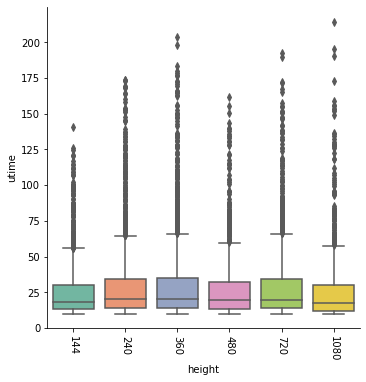

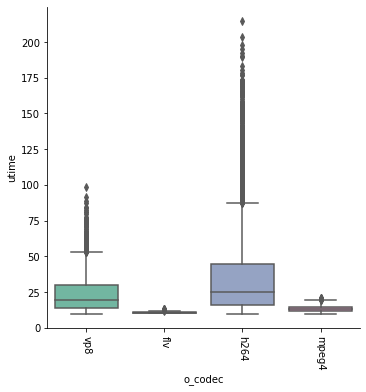

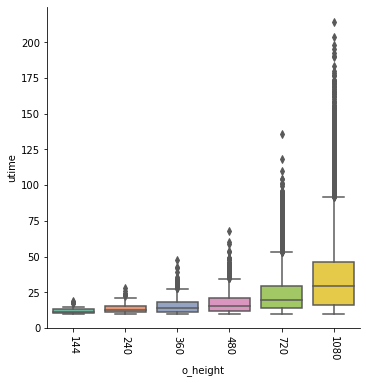

In [11]:
#Categorical Features & 'utime'
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

for i in df_cat.columns:
    sns.catplot(x=i, y=df["utime"], kind="box", palette="Set2", data= df_cat)
    plt.xticks(rotation=-90)
    plt.show()

### Numerical

In [12]:
#Drop b_size because there are just 0 

df_num = df.drop(["id","category","codec","height","o_codec","o_height","b_size"], axis= 1)

df_num.head()

,duration,width,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_bitrate,o_framerate,o_width,umem,utime
0,645.84000,320,95903,25.032558,138,16008,0,16146,1081321,6660941,7742262,109000,29.97,1280,218932,15.929
1,326.58832,1920,5999648,23.000000,174,7656,0,7830,16603953,228322925,244926878,820000,29.97,1920,218932,10.417
2,473.00000,320,164017,25.000000,198,10924,704,11826,1419320,8047423,9697521,242000,24.00,1920,645544,45.327
3,448.57500,1280,2052426,30.002232,92,13349,0,13441,9132637,105950761,115083398,3000000,15.00,1920,655172,102.842
4,255.28000,320,250276,25.000000,110,6272,0,6382,611474,7374864,7986338,820000,25.00,1920,216820,14.937


In [13]:
df_num.describe()

,duration,width,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_bitrate,o_framerate,o_width,umem,utime
count,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000
mean,285.682716,732.040000,1.021929e+06,24.047193,102.238500,6739.644417,8.541250,6850.424167,3.275502e+06,3.068757e+07,3.396592e+07,1.609223e+06,22.389475,1362.112000,296054.137333,28.092689
std,273.669721,541.014322,1.501773e+06,6.829639,83.873379,6405.047206,77.159695,6479.589846,4.821239e+06,6.327107e+07,6.715380e+07,1.825524e+06,6.421122,560.700761,162805.756293,23.432570
min,31.133000,176.000000,2.696800e+04,5.705752,7.000000,334.000000,0.000000,344.000000,1.438000e+04,2.029540e+05,2.289740e+05,5.600000e+04,12.000000,176.000000,34684.000000,10.001000
25%,95.462000,320.000000,1.868950e+05,23.000000,39.000000,2265.000000,0.000000,2318.000000,5.296270e+05,3.029350e+06,3.773200e+06,2.420000e+05,15.000000,640.000000,217080.000000,13.561000
50%,225.080000,480.000000,3.824610e+05,25.039877,80.000000,5515.000000,0.000000,5628.000000,1.259657e+06,6.965881e+06,9.656655e+06,5.390000e+05,24.000000,1280.000000,219480.000000,19.437000
75%,379.320000,1280.000000,1.055982e+06,29.968605,143.000000,9134.000000,0.000000,9208.000000,3.818903e+06,2.841694e+07,2.925619e+07,3.000000e+06,25.000000,1920.000000,318674.000000,33.494000
max,2554.440000,1920.000000,7.628466e+06,48.000000,1988.000000,62489.000000,1007.000000,63862.000000,9.082855e+07,7.689970e+08,8.067111e+08,5.000000e+06,29.970000,1920.000000,711824.000000,214.481000


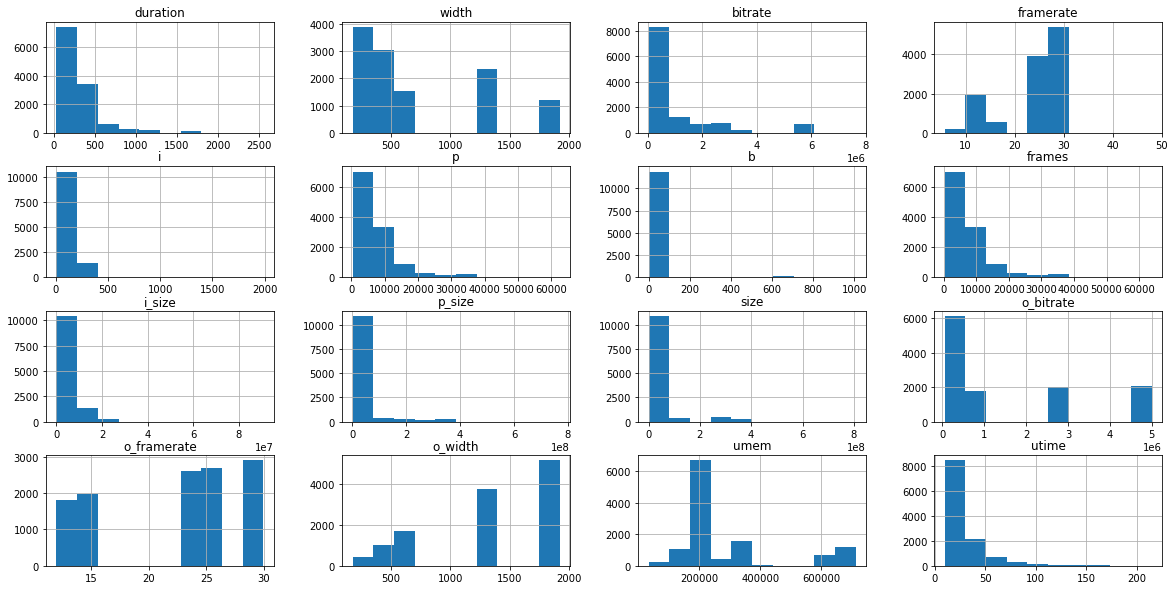

In [14]:
df_num.hist(figsize=(20,10))
plt.show()

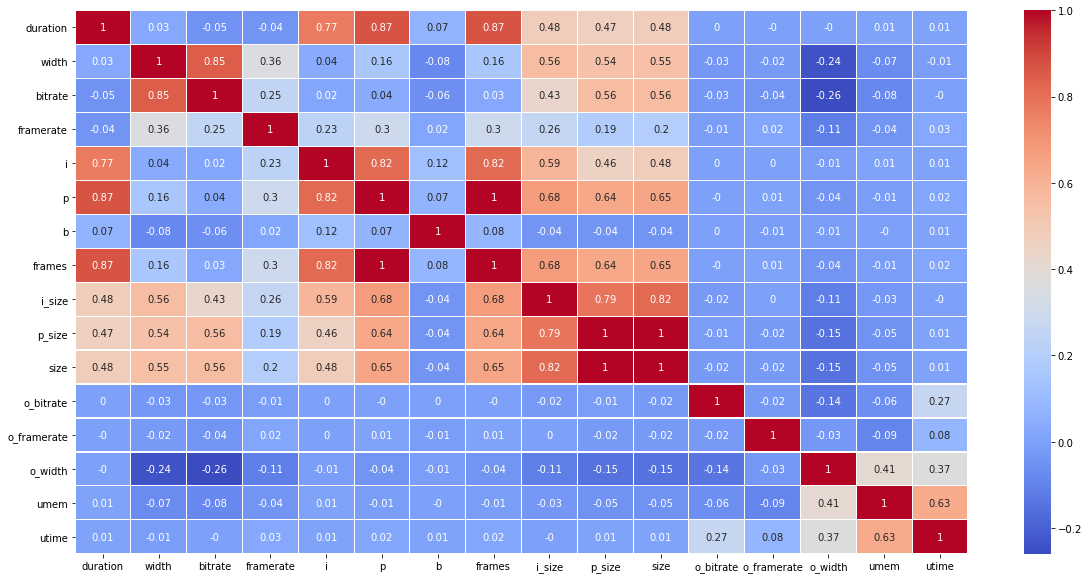

In [15]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (20,10))
sns.heatmap(data=df_num.corr().round(2), cmap='coolwarm', linewidths=0.1, annot=True, annot_kws={"size":10})
plt.show()

### Dummies

In [16]:
#Converting categorical into dummies 
dummies = pd.get_dummies(df_cat.astype(str)) 

dummies.tail()

,codec_flv,codec_h264,codec_mpeg4,codec_vp8,height_1080,height_144,height_240,height_360,height_480,height_720,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8,o_height_1080,o_height_144,o_height_240,o_height_360,o_height_480,o_height_720
11995,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
11996,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
11997,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
11998,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
11999,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


### Concatenation

In [17]:
#concatenation of dummies and numerical variables
df_new = pd.concat([df_num,dummies], axis = 1)

df_new.head()

,duration,width,bitrate,framerate,i,p,b,frames,i_size,p_size,...,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8,o_height_1080,o_height_144,o_height_240,o_height_360,o_height_480,o_height_720
0,645.84000,320,95903,25.032558,138,16008,0,16146,1081321,6660941,...,0,0,0,1,0,0,0,0,0,1
1,326.58832,1920,5999648,23.000000,174,7656,0,7830,16603953,228322925,...,1,0,0,0,1,0,0,0,0,0
2,473.00000,320,164017,25.000000,198,10924,704,11826,1419320,8047423,...,0,1,0,0,1,0,0,0,0,0
3,448.57500,1280,2052426,30.002232,92,13349,0,13441,9132637,105950761,...,0,1,0,0,1,0,0,0,0,0
4,255.28000,320,250276,25.000000,110,6272,0,6382,611474,7374864,...,0,0,1,0,1,0,0,0,0,0


## Train Models and Test

### Scaling

In [18]:
#Min-Max Scaling on Train and Test
from sklearn.preprocessing import MinMaxScaler

mm_scaler =  MinMaxScaler(copy=False,feature_range=(0, 1))

scaled_df = pd.DataFrame(mm_scaler.fit_transform(df_new), columns = df_new.columns)

scaled_df.head()

,duration,width,bitrate,framerate,i,p,b,frames,i_size,p_size,...,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8,o_height_1080,o_height_144,o_height_240,o_height_360,o_height_480,o_height_720
0,0.243612,0.082569,0.009069,0.456961,0.066128,0.252176,0.000000,0.248780,0.011749,0.008400,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.117091,1.000000,0.785724,0.408903,0.084301,0.117802,0.000000,0.117856,0.182676,0.296724,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.175114,0.082569,0.018029,0.456191,0.096416,0.170381,0.699106,0.180768,0.015470,0.010204,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.165434,0.633028,0.266455,0.574463,0.042908,0.209396,0.000000,0.206194,0.100406,0.137550,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.088831,0.082569,0.029377,0.456191,0.051994,0.095535,0.000000,0.095060,0.006575,0.009329,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Target Variable

In [19]:
X = scaled_df.drop(["utime"],axis=1)
y = df["utime"]

X.head()

,duration,width,bitrate,framerate,i,p,b,frames,i_size,p_size,...,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8,o_height_1080,o_height_144,o_height_240,o_height_360,o_height_480,o_height_720
0,0.243612,0.082569,0.009069,0.456961,0.066128,0.252176,0.000000,0.248780,0.011749,0.008400,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.117091,1.000000,0.785724,0.408903,0.084301,0.117802,0.000000,0.117856,0.182676,0.296724,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.175114,0.082569,0.018029,0.456191,0.096416,0.170381,0.699106,0.180768,0.015470,0.010204,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.165434,0.633028,0.266455,0.574463,0.042908,0.209396,0.000000,0.206194,0.100406,0.137550,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.088831,0.082569,0.029377,0.456191,0.051994,0.095535,0.000000,0.095060,0.006575,0.009329,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y.head()

0     15.929
1     10.417
2     45.327
3    102.842
4     14.937
Name: utime, dtype: float64

### Split Train and Test

In [21]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.15, 
                                                    random_state = 123) 

print(X_train.shape, X_test.shape)

(10200, 35) (1800, 35)


### Grid Search

In [22]:
from sklearn.model_selection import GridSearchCV

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
        
    from sklearn import metrics
    print()
    print("MAE  train %.3f    test %06.3f" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_test, y_pred_test) ) )
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

### Train and Test Different Models

#### best Result -- Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[200] ,
              "min_samples_leaf": [10], "min_samples_split": [10]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -3.934833 using {'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}

MAE  train 2.857    test 03.578
MSE  train 25.261 test 36.960
RMSE train 5.026   test 6.079
r2   train 0.954     test 0.933


#### The others

In [24]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -3042644.380030 using {}

MAE  train 9.194    test 09.756
MSE  train 188.388 test 202.766
RMSE train 13.725   test 14.240
r2   train 0.657     test 0.630


In [25]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -8.895156 using {'alpha': 0.1, 'normalize': True}

MAE  train 8.866    test 09.356
MSE  train 191.864 test 205.052
RMSE train 13.851   test 14.320
r2   train 0.651     test 0.626


In [26]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -9.034562 using {'alpha': 0.01, 'normalize': True}

MAE  train 9.103    test 09.464
MSE  train 210.751 test 222.930
RMSE train 14.517   test 14.931
r2   train 0.616     test 0.594


In [27]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -6.264154 using {'n_neighbors': 20, 'p': 2}

MAE  train 5.441    test 05.845
MSE  train 86.232 test 95.700
RMSE train 9.286   test 9.783
r2   train 0.843     test 0.826


In [28]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,8), 
              "min_samples_leaf": [5]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -5.215088 using {'max_depth': 7, 'min_samples_leaf': 5}

MAE  train 4.812    test 05.343
MSE  train 59.412 test 79.070
RMSE train 7.708   test 8.892
r2   train 0.892     test 0.856


In [ ]:
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,1000],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear','poly'],
             'degree': [2,3]
             }

gs_regression(regressor, parameters)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor()
parameters = {"n_estimators":[51], "learning_rate":[ 0.5], 
              "loss": ['square']}

gs_regression(regressor, parameters)

In [ ]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[5000]}

gs_regression(regressor, parameters)

## SHAP

In [ ]:
import shap

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)

In [ ]:
model = tree.fit(X_train, y_train)

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_train)

## Predictions

In [ ]:
pred_df = pd.read_csv("predictions.csv")
pred_df.head()

In [ ]:
df_cat = pred_df[["codec","height","o_codec", "o_height"]]
df_num = pred_df.drop(["id","category","codec","height","o_codec","o_height","b_size"], axis= 1)

dummies = pd.get_dummies(df_cat.astype(str)) 

df_new = pd.concat([df_num,dummies], axis = 1)

scaled_df = pd.DataFrame(mm_scaler.fit_transform(df_new), columns = df_new.columns)
scaled_df.head()

In [ ]:
X = scaled_df

In [ ]:
model = RandomForestRegressor(criterion='mse', min_samples_leaf=1, n_estimators=100, random_state=42)

model.fit(X_train,y_train)

y_predictions=model.predict(X)

In [ ]:
y_predictions

In [ ]:
#Export predictions
pred_df['target'] = y_predictions
pred_df.to_csv('Pred_df.csv')
pred_df